In [30]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import numpy as numpy
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.models as models

tensor([[[[0.6706, 0.6706, 0.6706,  ..., 0.7373, 0.7373, 0.7373],
          [0.6706, 0.6706, 0.6706,  ..., 0.7373, 0.7373, 0.7373],
          [0.6706, 0.6706, 0.6706,  ..., 0.7373, 0.7373, 0.7373],
          ...,
          [0.2824, 0.2824, 0.2824,  ..., 0.3216, 0.3216, 0.3216],
          [0.2824, 0.2824, 0.2824,  ..., 0.3216, 0.3216, 0.3216],
          [0.2824, 0.2824, 0.2824,  ..., 0.3216, 0.3216, 0.3216]],

         [[0.4510, 0.4510, 0.4510,  ..., 0.6627, 0.6627, 0.6627],
          [0.4510, 0.4510, 0.4510,  ..., 0.6627, 0.6627, 0.6627],
          [0.4510, 0.4510, 0.4510,  ..., 0.6627, 0.6627, 0.6627],
          ...,
          [0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961],
          [0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961],
          [0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1961]],

         [[0.3059, 0.3059, 0.3059,  ..., 0.3647, 0.3647, 0.3647],
          [0.3059, 0.3059, 0.3059,  ..., 0.3647, 0.3647, 0.3647],
          [0.3059, 0.3059, 0.3059,  ..., 0

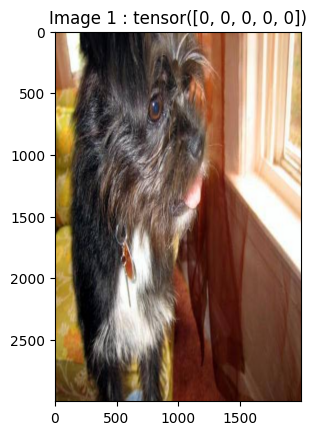

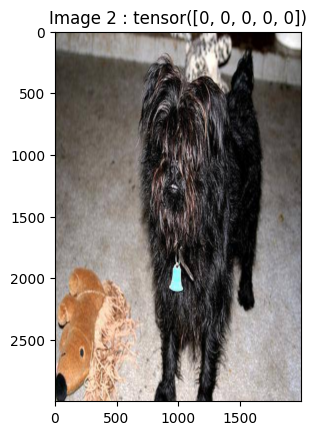

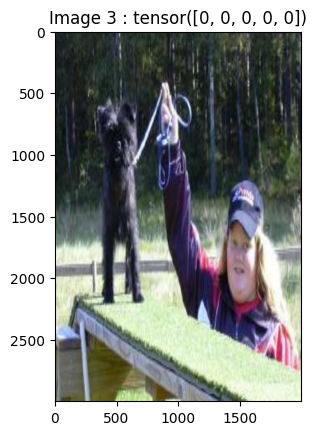

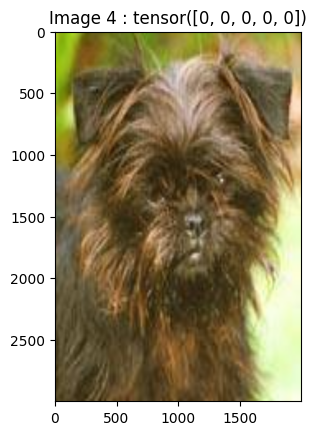

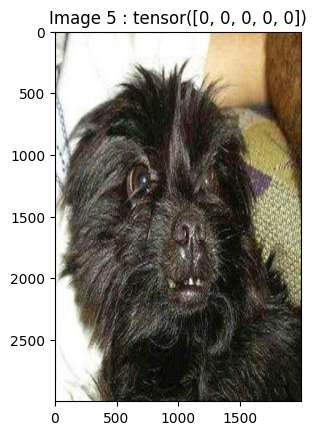

In [29]:
# Define the transformation to be applied to each image
# x=(x-mean)/std
transform = transforms.Compose([
    transforms.Resize((3000,2000)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    # transforms.Lambda(lambda x: x * 255.0)

])

# Load the images from the folder
dataset = datasets.ImageFolder('./ImageByClasses', transform=transform)

BATCH_SIZE=5
# Create a data loader to load the images in batches
data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# Iterate over the data loader to get the tensors
for images, labels in data_loader:
    # Do something with the tensors
    print(images)
    print(images.shape)
    
    # Convert the tensor to NumPy array
    images_np = images.numpy()

    # Iterate through each image in the batch
    for i in range(images_np.shape[0]):
        # Extract the current image from the batch
        current_image = images_np[i, :, :, :]

        # Transpose the dimensions to match the order expected by matplotlib (H x W x C)
        current_image = current_image.transpose(1, 2, 0)

        # Display the image using matplotlib
        plt.imshow(current_image)
        plt.title(f"Image {i + 1} : {labels}")
        plt.show()
    break


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [38]:

class Dog(nn.Module):
    def __init__(self,num_classes=120):
        super(Dog, self).__init__()
        self.vgg16 = models.vgg16(pretrained=True)  # Cargar el modelo VGG-16 preentrenado
        # Congelar las capas para que los pesos no se actualicen durante el entrenamiento
        for param in self.vgg16.parameters():
            param.requires_grad = False
        # Modificar la última capa para adaptarse al número de clases
        in_features = self.vgg16.classifier[6].in_features
        self.vgg16.classifier[6] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.vgg16(x)




In [40]:
num_classes = 120
num_epochs = 20
batch_size = 16
learning_rate = 0.005
model = Dog(num_classes)

In [41]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  


# Train the model
total_step = len(data_loader)

NameError: name 'train_loader' is not defined